# Tasca S8.01. Visualitzacions en Python

## Descripció

Aquesta pràctica permetrà explorar com es poden utilitzar eines de visualització avançades en Python per a interpretar i presentar dades de manera efectiva, proporcionant una oportunitat valuosa per a millorar les habilitats analítiques i tècniques.

## Nivell 1



Realitza la connexió en Python amb el MySQL Workbench per a carregar tota la informació que tens en les taules.

Realitzaràs una visualització per a cada exercici. Comenta el que et crida l'atenció de graficar aquesta variable, justifica l'elecció del gràfic i interpreta els resultats en funció de les teves dades.

In [5]:
pip install pymysql

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for pymysql from https://files.pythonhosted.org/packages/0c/94/e4181a1f6286f545507528c78016e00065ea913276888db2262507693ce5/PyMySQL-1.1.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/45.0 kB ? eta -:--:--
   ------------------------------------ --- 41.0/45.0 kB 653.6 kB/s eta 0:00:01
   ---------------------------------------- 45.0/45.0 kB 551.3 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


### SQL ALCHEMY

### Importar pandas, establir connexió, generar dataframes i importar llibreries

In [ ]:
# Importar pandas
import pandas as pd
import sqlalchemy
from sqlalchemy import create_engine, inspect, text

#Importar altres llibreries
import matplotlib.pyplot as plt #genera gràfics a partir de continguts en llistes, vector amb py i amb l'extensió NumPy
import seaborn as sns #llibreria especialitzada en visualització de dades per py desenvolupada amb matplotlib  i ofereix interficie d'alt nivell
#import squarify
#import plotly.express as px
import numpy as np
import warnings

#Establir connexió
engine = create_engine("mysql+pymysql://root@localhost/ecommerce")
cnx = engine.connect()

#Generar Dataframes
inspector = inspect(engine)
nombre_tablas = inspector.get_table_names()

for table in nombre_tablas:
    query = f"select  * from {table}"
    globals ()[f"df_{table}"] = pd.read_sql(query, cnx)

### Importar pandas i establir connexió

In [4]:
import pandas as pd
import sqlalchemy
from sqlalchemy import create_engine, inspect

engine = create_engine("mysql+pymysql://root@localhost/ecommerce")
cnx = engine.connect()

#### Importar taula per borrar

In [ ]:
import pandas as pd
import sqlalchemy
from sqlalchemy import create_engine, inspect

engine = create_engine("mysql+pymysql://root@localhost/borrar")
cnx = engine.connect()

### Generar Dataframes

In [6]:
inspector = inspect(engine)
nombre_tablas = inspector.get_table_names()

for table in nombre_tablas:
    query = f"select  * from {table}"
    globals ()[f"df_{table}"] = pd.read_sql(query, cnx)

### Mostrar taules

In [12]:
#print(nombre_tablas)
nombre_tablas
#df_transactions

['card_state',
 'companies',
 'credit_cards',
 'product_transaction',
 'products',
 'transactions',
 'users']

### Importar llibreries

In [14]:
import matplotlib.pyplot as plt #genera gràfics a partir de continguts en llistes, vector amb py i amb l'extensió NumPy
import seaborn as sns #llibreria especialitzada en visualització de dades per py desenvolupada amb matplotlib  i ofereix interficie d'alt nivell
#import squarify
#import plotly.express as px
import numpy as np
import warnings

### Sintàxis de pandas

In [ ]:
df.head() # por defecto son 5
df.head(8) # muestro primeras 8 
df.tail(8) # muestro ultimos 8
df.shape    #cantidad de filas (1°) y luego columnas
df.describe() #estadísticas descriptivas

tipos de datos:

df.info() #todos los datos, tambien cantidad de valores no nulos.
df.dtypes #todos los datos de todo el df, object=varchar
df["columna"].dtype #datos de esa columna

In [16]:
df_transactions["amount"].describe()


count    587.000000
mean     256.735520
std      144.133895
min       15.050000
25%      131.115000
50%      257.440000
75%      389.900000
max      499.230000
Name: amount, dtype: float64

In [25]:
df_transactions["amount"].mean()

256.7355195911414

### Merge

In [ ]:
df_merged = transactions_df.merge(transactions_products_df, how="inner", left_on="id", right_on="transaction_id").merge(products_df, how="inner", left_on="product_id", right_on="id")

df_merged

### Columnes calculades

In [ ]:
#Suma columna calculada
df_transactions2[“nombre_de_la_columna”] = df_merged [“long”] +  df_merged[“latitude”]

#Where
products_df["Over100andLight"] = np.where((products_df["price"] > 100) & (products_df["weight"] < 1), "Yes", "No") 
#Un altre where
products_df[products_df["Over100andLight"] == "Yes"]

#Múltiples condicions
conditions = [
    (products_df["weight"] < 1.5),
    (products_df["weight"] >= 1.5) & (products_df["weight"] < 3),
    (products_df["weight"] >= 3)
]

values = ["light", "medium", "heavy"]

products_df["weight_category"] = np.select(conditions, values)

products_df


### Agrupar

In [ ]:
#Agrupa el DataFrame per la columna de categories i calcula la suma dels valors per a cada categoria.
data = {
    'Category': ['A', 'A', 'B', 'B', 'C', 'C'],
    'Values': [1, 2, 3, 4, 5, 6]
}
df = pd.DataFrame(data)

grouped = df.groupby("Category").sum()
grouped

### Borrar columna

In [ ]:
#Elimina una de les columnes originals.
df["D"] = df["A"] + df["B"] + df["C"]

df

df = df.drop("B", axis = 1)

df

#### Proba gràfic

<Axes: xlabel='amount', ylabel='Count'>

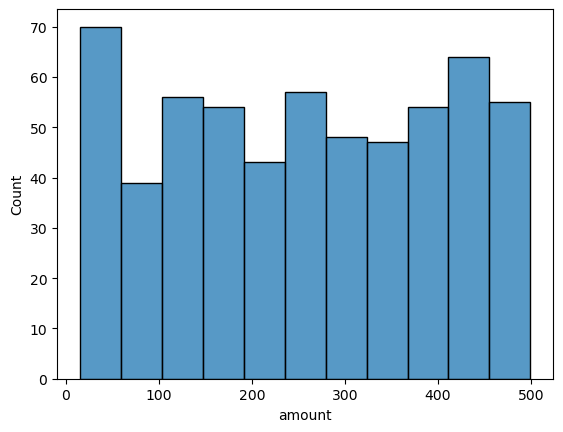

In [35]:
sns.histplot(df_transactions["amount"])

### Eliminar base de dades

In [39]:
cnx.execute("DROP DATABASE borrar")

### Tancar connexió

In [18]:
cnx.close()

### Comprovar que la connexió estigui tancada (resposta TRUE)

In [20]:
cnx.closed

True

### Desactivar engine

In [22]:
engine.dispose()